In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

In [2]:
df = pd.read_csv('drug200.csv')
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [3]:
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print(nan_cols)

[]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
include =['object', 'float', 'int']
perc =[.20, .40, .60, .80]  
desc = df.describe(percentiles = perc, include = include)
desc

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
20%,28.000000,NaN,NaN,NaN,10.066600,NaN
40%,39.000000,NaN,NaN,NaN,12.419800,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN


In [6]:
print(df.columns)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [7]:
print("Dataset shape:", df.shape)

Dataset shape: (200, 6)


In [8]:
for col in df.columns:
    print(df[col].value_counts())

47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64
M    104
F     96
Name: Sex, dtype: int64
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
12.006    2
18.295    2
25.355    1
11.939    1
16.347    1
         ..
24.658    1
24.276    1
13.967    1
19.675    1
11.349    1
Name: Na_to_K, Length: 198, dtype: int64
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


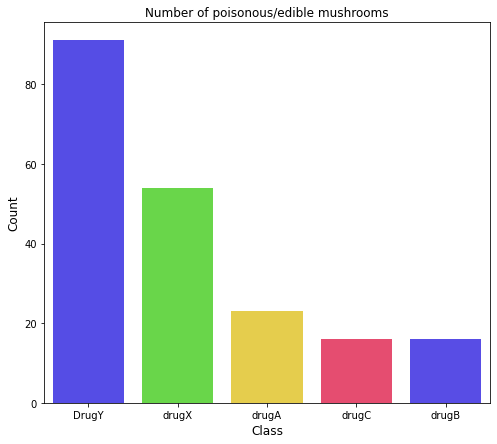

In [9]:
count = df['Drug'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

In [10]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [11]:
le = LabelEncoder()
le.fit(df.BP)
df.BP = le.transform(df.BP)
le.fit(df.Cholesterol) 
df.Cholesterol = le.transform(df.Cholesterol)
le.fit(df.Drug) 
df.Drug = le.transform(df.Drug)
le.fit(df.Sex) 
df.Sex = le.transform(df.Sex)

In [12]:
print(df.to_string())

     Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    0   0            0   25.355     0
1     47    1   1            0   13.093     3
2     47    1   1            0   10.114     3
3     28    0   2            0    7.798     4
4     61    0   1            0   18.043     0
5     22    0   2            0    8.607     4
6     49    0   2            0   16.275     0
7     41    1   1            0   11.037     3
8     60    1   2            0   15.171     0
9     43    1   1            1   19.368     0
10    47    0   1            0   11.767     3
11    34    0   0            1   19.199     0
12    43    1   1            0   15.376     0
13    74    0   1            0   20.942     0
14    50    0   2            0   12.703     4
15    16    0   0            1   15.516     0
16    69    1   1            1   11.455     4
17    43    1   0            0   13.972     1
18    23    1   1            0    7.298     3
19    32    0   0            1   25.974     0
20    57    1   1            1   1

In [13]:
'''df['Drug'] = df['Drug'].astype('category')
df['BP'] = df['BP'].astype('category')
df['Cholesterol'] = df['Cholesterol'].astype('category')'''


"df['Drug'] = df['Drug'].astype('category')\ndf['BP'] = df['BP'].astype('category')\ndf['Cholesterol'] = df['Cholesterol'].astype('category')"

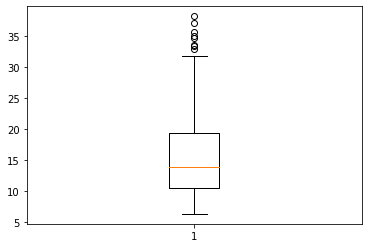

<Figure size 720x504 with 0 Axes>

In [14]:

plt.boxplot(df["Na_to_K"])
fig = plt.figure(figsize =(10, 7))
plt.show()

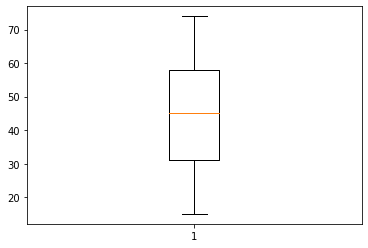

<Figure size 720x504 with 0 Axes>

In [15]:
plt.boxplot(df["Age"])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [16]:
print(df.BP.dtype)
print(df.Drug.dtype)

int32
int32


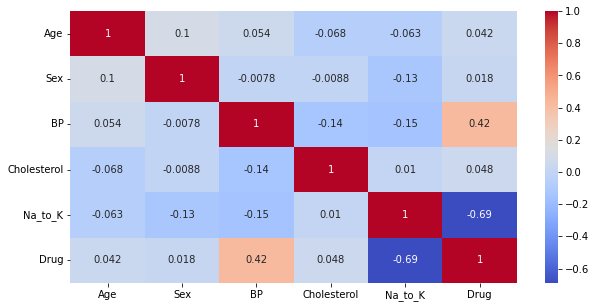

In [17]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True , cmap = 'coolwarm' );

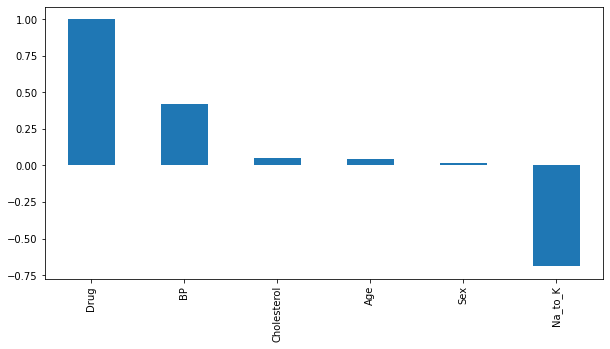

In [18]:
corr_mat = df.corr()
plt.figure(figsize = (10,5))
corr_mat['Drug'].sort_values(ascending = False).plot(kind = 'bar');

In [19]:
df.corr()['Drug'].abs().sort_values(ascending=False)

Drug           1.000000
Na_to_K        0.689051
BP             0.419397
Cholesterol    0.048415
Age            0.041856
Sex            0.018239
Name: Drug, dtype: float64

In [20]:
print(df['Drug'].dtype)

int32


In [21]:
df['Sex']
df = df.drop(["Sex"],axis=1)

In [22]:
cat_col = ['BP', 'Cholesterol']

df = pd.get_dummies(data=df, drop_first=True, columns = cat_col)

print(df)

     Age  Na_to_K  Drug  BP_1  BP_2  Cholesterol_1
0     23   25.355     0     0     0              0
1     47   13.093     3     1     0              0
2     47   10.114     3     1     0              0
3     28    7.798     4     0     1              0
4     61   18.043     0     1     0              0
..   ...      ...   ...   ...   ...            ...
195   56   11.567     3     1     0              0
196   16   12.006     3     1     0              0
197   52    9.894     4     0     1              0
198   23   14.020     4     0     1              1
199   40   11.349     4     1     0              1

[200 rows x 6 columns]


In [23]:
'''from sklearn import preprocessing
columns = df.columns
for i in columns:
    if df.dtypes[i] is object:
        print("Cannot process object data")
    

## if skew is 0.5 and -0.5 i.e its normal distribution and use scaler else normalise
scale_list = []
normalise_list = []
data_skew = df.skew()

for i in columns:
    if data_skew[i] >= -0.5 and data_skew[i] <= 0.5:
        scale_list.append(i)
    else:
        normalise_list.append(i)
print(scale_list)
print(normalise_list)'''

'from sklearn import preprocessing\ncolumns = df.columns\nfor i in columns:\n    if df.dtypes[i] is object:\n        print("Cannot process object data")\n    \n\n## if skew is 0.5 and -0.5 i.e its normal distribution and use scaler else normalise\nscale_list = []\nnormalise_list = []\ndata_skew = df.skew()\n\nfor i in columns:\n    if data_skew[i] >= -0.5 and data_skew[i] <= 0.5:\n        scale_list.append(i)\n    else:\n        normalise_list.append(i)\nprint(scale_list)\nprint(normalise_list)'

In [24]:
'''col_names = ['Age']
features = df[col_names]
scaler = preprocessing.StandardScaler().fit(features.values)
features = scaler.transform(features.values)
print(features)
df[col_names] = features
print(df['Age'])
print(df['Age'].shape)'''

"col_names = ['Age']\nfeatures = df[col_names]\nscaler = preprocessing.StandardScaler().fit(features.values)\nfeatures = scaler.transform(features.values)\nprint(features)\ndf[col_names] = features\nprint(df['Age'])\nprint(df['Age'].shape)"

In [25]:
'''col_names = ['Na_to_K']
features = df[col_names]
scaler_1 = preprocessing.MinMaxScaler().fit(features.values)
features = scaler_1.transform(features.values)
df[col_names] = features
print(df)'''

"col_names = ['Na_to_K']\nfeatures = df[col_names]\nscaler_1 = preprocessing.MinMaxScaler().fit(features.values)\nfeatures = scaler_1.transform(features.values)\ndf[col_names] = features\nprint(df)"

In [26]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [27]:
from sklearn.linear_model import LogisticRegression

## lr = LogisticRegression(solver="lbfgs")
lr = LogisticRegression(solver="liblinear")
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100, 2)))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       0.00      0.00      0.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      0.83      0.91         6

    accuracy                           0.80        20
   macro avg       0.73      0.77      0.74        20
weighted avg       0.72      0.80      0.74        20

Test Accuracy: 80.0%


c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

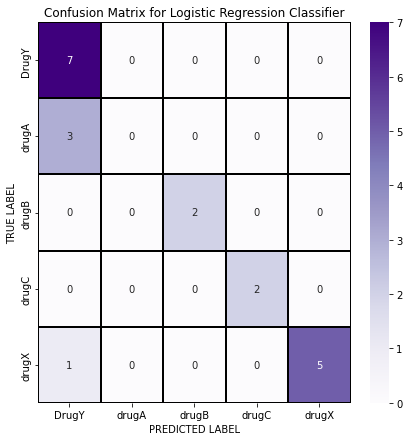

In [28]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["DrugY", "drugA", "drugB", "drugC", "drugX"]
y_axis_labels = ["DrugY", "drugA", "drugB", "drugC", "drugX"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [29]:
from sklearn.neighbors import KNeighborsClassifier

A = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)

    A.append((i, knn.score(X_test, y_test)*100)) 

print(A)

[(1, 60.0), (2, 65.0), (3, 70.0), (4, 60.0), (5, 60.0), (6, 60.0), (7, 60.0), (8, 55.00000000000001), (9, 55.00000000000001)]


In [30]:
from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))
print("Test Accuracy: {}%".format(round(knn.score(X_test, y_test)*100, 2)))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.50      0.83      0.62         6

    accuracy                           0.60        20
   macro avg       0.26      0.37      0.30        20
weighted avg       0.42      0.60      0.49        20

Test Accuracy: 55.0%


c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Test Accuracy: 100.0%


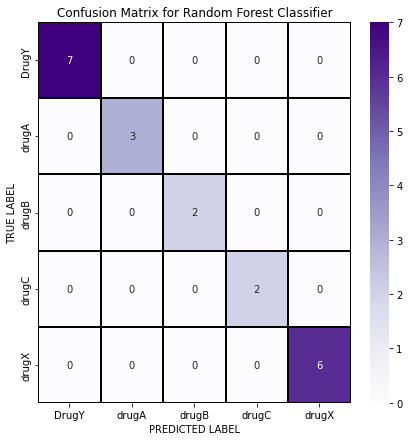

In [32]:
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["DrugY", "drugA", "drugB", "drugC", "drugX"]
y_axis_labels = ["DrugY", "drugA", "drugB", "drugC", "drugX"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()